# Statistikk oppgave

I denne oppgaven brukte gruppa en app til å samle inn **data** fra **akselometeren** i mobilen (iphone 11). Ved å **databehandle** denne dataen kunne vi komme fram til omtrent hvor mange skritt som ble tatt, omtrent hvor langt personen gikk. I tilegg kunne vi finne **gjennomsnittlig** akselerasjon og gjøre en **regresjon** for akselerasjonen (som kan brukes til å studere bevegelsen)

Man kunne finne hvor langt personen hadde gått ved å ta ett numerisk integral av akselerasjonen fremover. Dette kan gjøres med formen:
$\sum_{i=0}^{n-1}*h*f(x_1)$

I tillegg fant jeg litt tips fra redditoren **Lewri** på å finne en måte å gjøre en "regresjon" av en sinusoid.
https://www.reddit.com/r/learnpython/comments/he8kgs/sinusoidal_regression/

Da bruker jeg formelen vi lærte i R1 og definerer denne som regresjon:
$Asin(cx+ϕ)+d$

Så gjetter jeg på noen verdier som blir lagret i initial.
A = 8.5, c=3.3*np.pi, phi=0, d=0

Bruker så funksjonen curve_fit men regresjon, tid, a_z og initial som parametere.
Dette gir meg tilpasset verdier for A, c, phi, d.

*NB: c kom jeg fram til ved å teste meg med vilkårlige verdier mellom 2*np.pi og 4*np.pi. Prøvde første 2, men da ble A svært liten (0.1). Når gjettene for c var bedre, ble plutselig A mye mere riktig. Altså krever denne algoritmen litt menneskelig input*

statistikk av a_z (akselerasjon oppover)
gjennomsnitt:  0.098 +- 3.896

personen tokk 64 skritt
gjennom turen hadde han en gjennomsnittsfart på 0.8861 m/s
han gikk omtrent 33.9737 meter


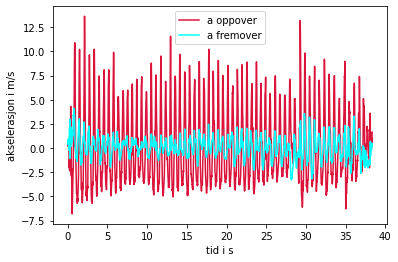

In [34]:
from pylab import *
import numpy as np
from scipy.optimize import curve_fit

data = loadtxt('data.csv',skiprows=1,delimiter=",") 
# definerer variabelen data som datafilen data.csv
# hopper over første linje med skiprows og setter "," som deler
tid = data[:,0] # setter variabelen tid som en matrise av kolonne 0
total_tid = list(tid) 
total_tid = tid[-1]
a_z = data[:,3] # setter variabelen a_z som en matrise av kolonne 3
a_y = data[:,2] # setter variabelen a_y som en matrise av kolonne 2

# definerer en funksjon som kan beregne integraler med to matriser (aksene) som input.
def integral(a,b):
    A = 0
    a = list(a)
    b = list(b)
    h = (b[-1]-b[0])/len(b)
    for i in range(0,len(b)-1):
        A += ((h*(a[i]+a[i+1]))/2)
    return A

def gjennomsnitt(a):
    i = (1/len(a))*sum(a)
    return i

def standardavvik(a):
    f = 0
    snitt = gjennomsnitt(a)
    for i in a:
        f += (i-snitt)**2
    f = (f*(1/len(a)))**0.5
    return f

def regresjon(x,A,b,phi,c): # funksjonsuttrykket som brukes til curve_fit
    y = A*np.sin(b*x+phi)+c
    return y

def sinusoid(a,values): # funksjon for å printe ut grafen med "curve_fit" verdiene for A, c, phi, d
    list(values)
    A = values[0]
    c = values[1]
    phi = values[2]
    d = values[3]
    y = A*np.sin((c*a)+phi)+d
    return y

initial = (8.5, 3.3*np.pi, 2, 0)

popt, pcov = curve_fit(regresjon, tid, a_z, initial)

trigger = False # en bolean som brukes for å se "statusen" av om i > 2
skritt = 0

for i in a_z:
    if i > 2:
        if trigger == False: # hvis trigger ikke var sann fra før, gjør den sann
            skritt += 1
            trigger = True
        else:
            pass
    elif i < 0:
        trigger = False

v = round(integral(a_y,tid),4)
s = round(v*total_tid,4)
print("statistikk av a_z (akselerasjon oppover)\ngjennomsnitt: ",round(gjennomsnitt(a_z),3),"+-",round(standardavvik(a_z),3))
print("\npersonen tokk",skritt,"skritt")
print("gjennom turen hadde han en gjennomsnittsfart på",v,"m/s")
print("han gikk omtrent",s,"meter")
plot(tid,a_z,color="crimson",label="a oppover")
plot(tid,a_y,color="cyan",label="a fremover")
ylabel("akselerasjon i m/s")
xlabel("tid i s")
legend()

regreserte verdier:
A: 3.9589 
c: 10.4022 
phi: -1.1747 
d: 0.0922


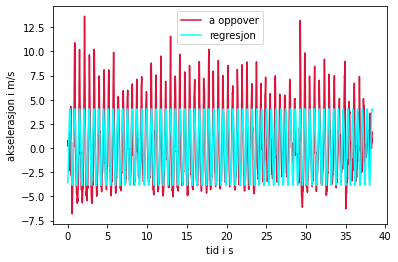

In [37]:
# Regresjonsplot
verdier = list(popt)
print("regreserte verdier:\nA:",round(verdier[0],4),"\nc:",round(verdier[1],4),"\nphi:",round(verdier[2],4),"\nd:",round(verdier[3],4))
plot(tid,a_z,color="crimson",label="a oppover")
plot(tid,sinusoid(tid,popt),color="cyan",label="regresjon")
ylabel("akselerasjon i m/s")
xlabel("tid i s")
legend()
show()